# Wine Quality SVC Model

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

## Read and prepare datset

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*no null dataset therefore no need to handle the missing values*

## EDA

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- all features are of numerical type
- There is no null value in any feature

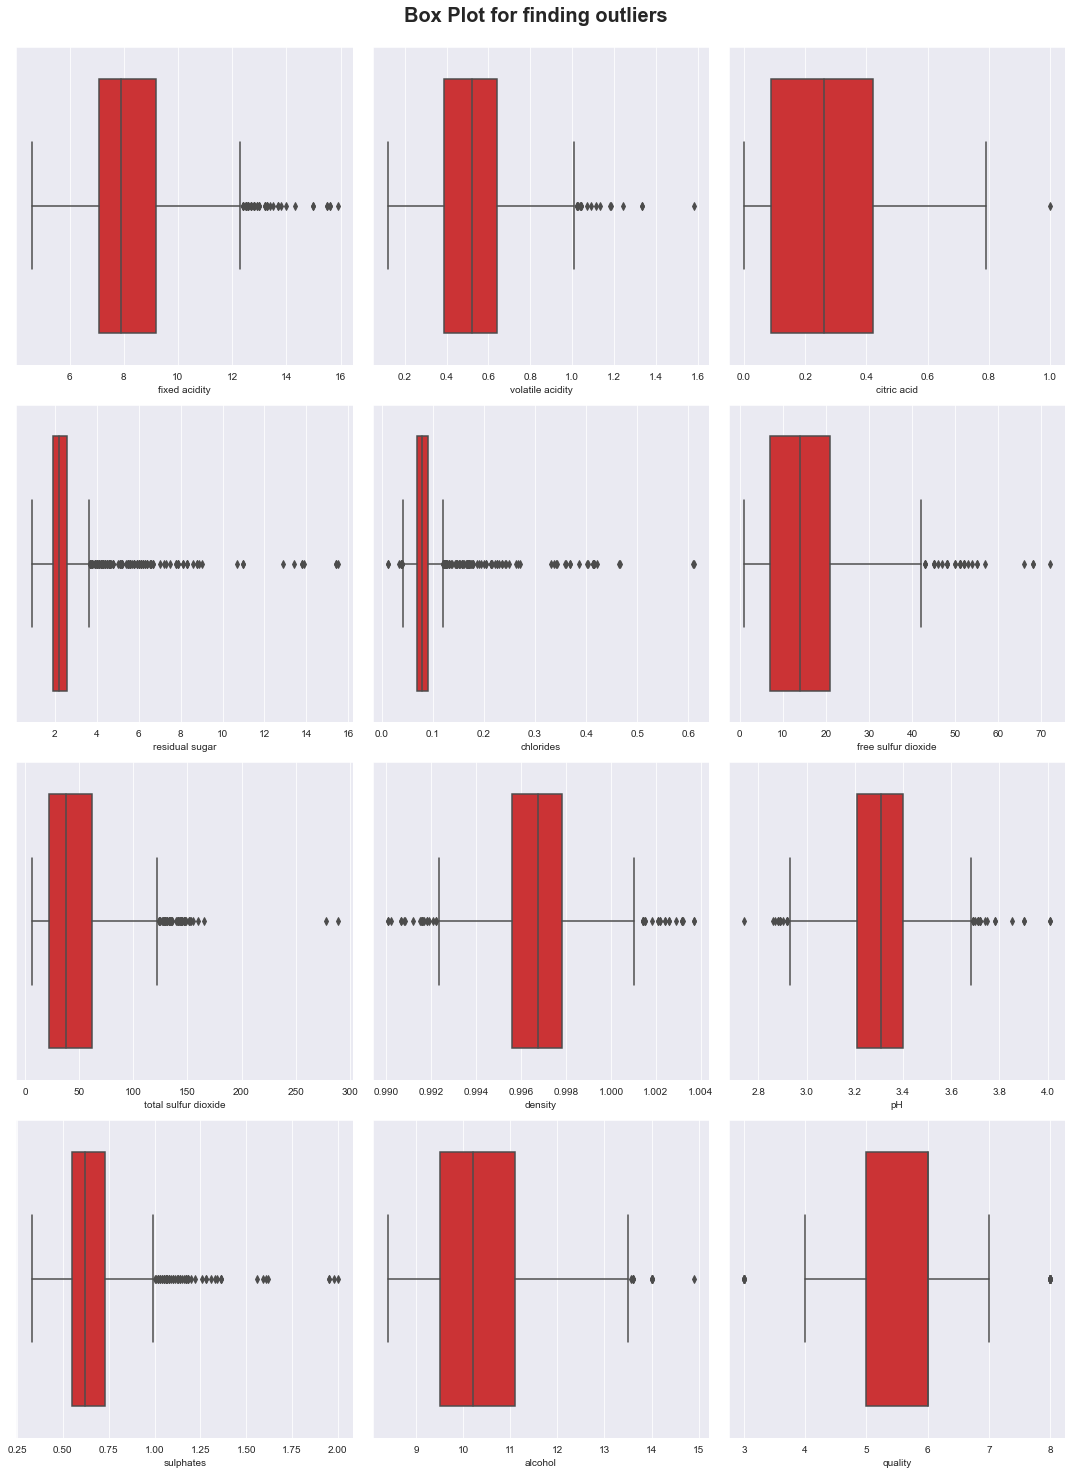

In [9]:
# boxplot to find out ouliers in the features    
rows = 5
cols = 3
fig = plt.figure( figsize=(cols*5, rows*5))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)


for i, col in enumerate(df.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = col,orient='v', data=df, palette="Set1")
fig.tight_layout()  
plt.show()

- There are many outliers in residual sugar and chlorides

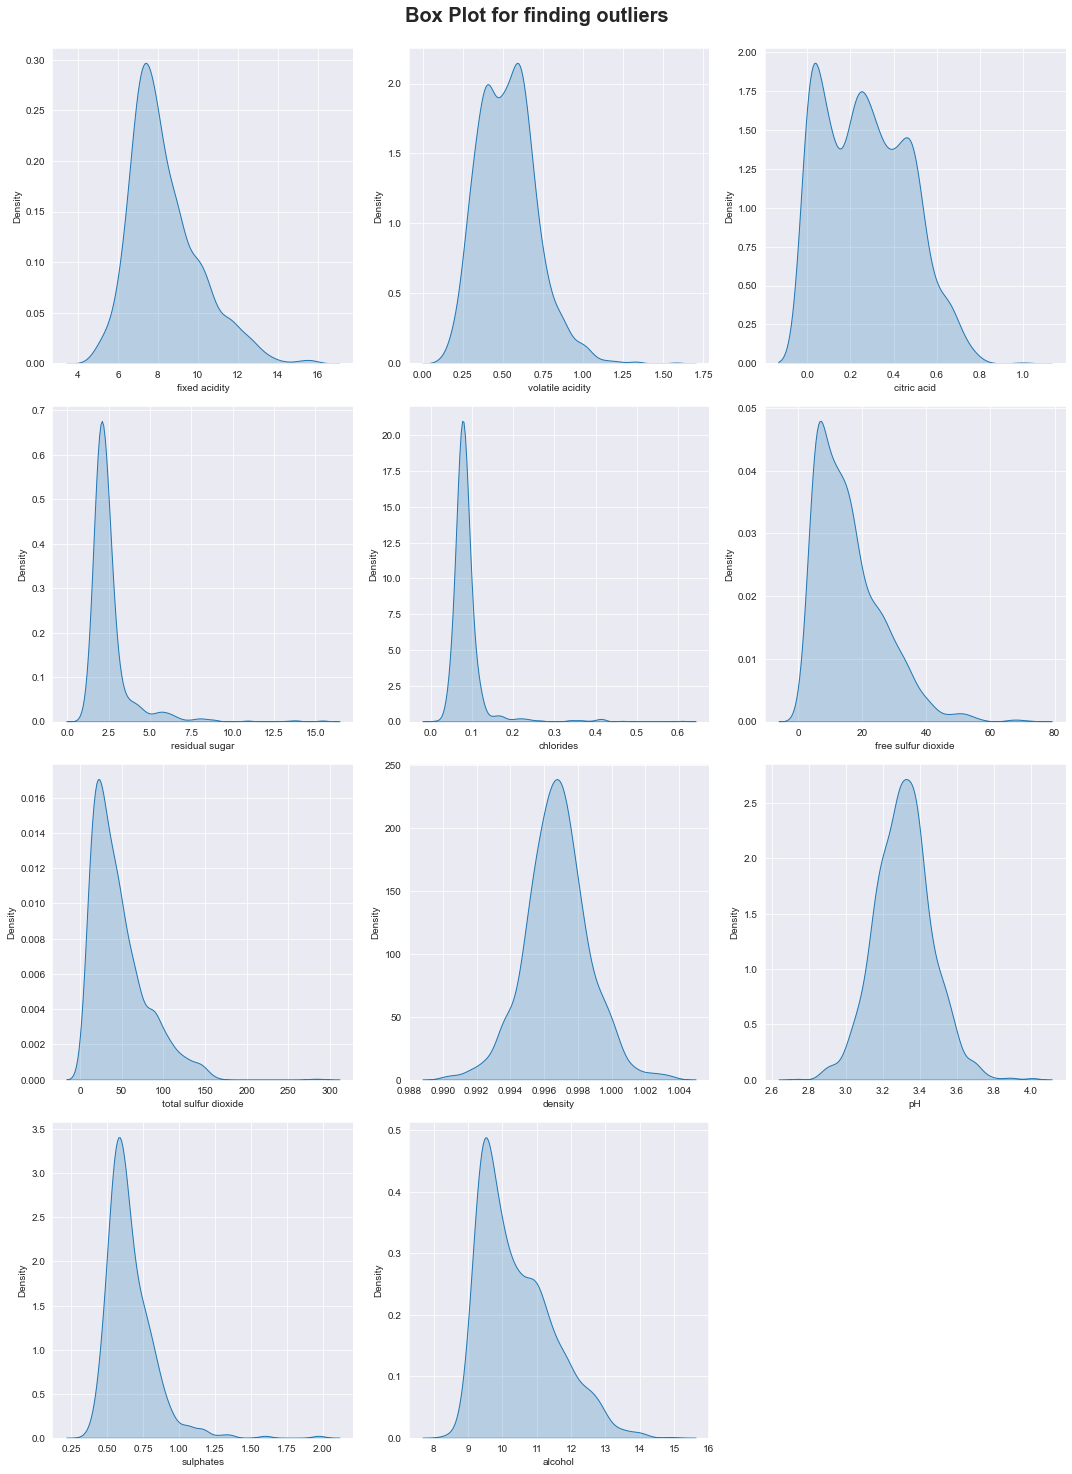

In [10]:
## Checking the distribution of all the features

rows = 5
cols = 3
fig = plt.figure( figsize=(cols*5, rows*5))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)


for i, col in enumerate(df.columns[:-1]):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x = col,shade=True, data=df)
fig.tight_layout()  
plt.show()

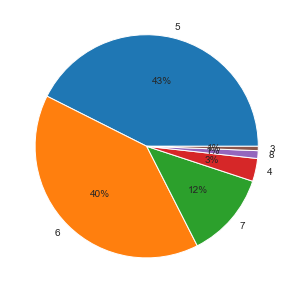

In [11]:
plt.figure(figsize=(5,8))
plt.pie(df.quality.value_counts().values, labels=df.quality.value_counts().index, autopct="%.0f%%")
plt.show()

- most of the wines have quality 5 and 6

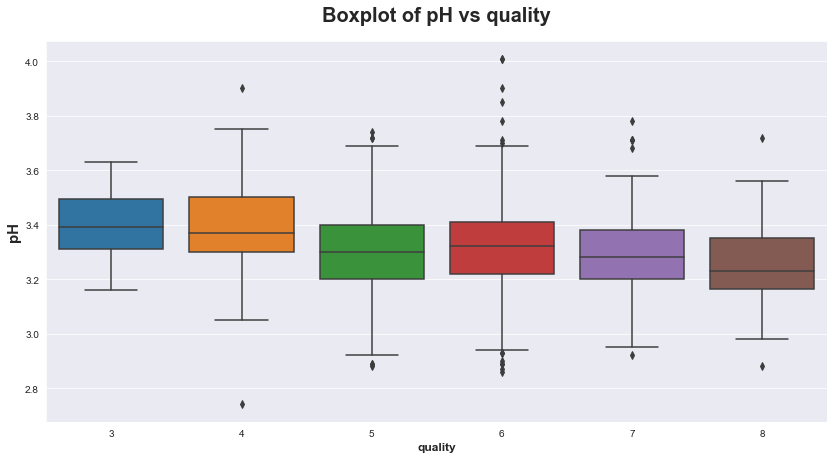

In [12]:
plt.subplots(figsize=(14,7))
sns.boxplot(x = 'quality', y='pH',data=df)
plt.title("Boxplot of pH vs quality", weight="bold",fontsize=20, pad=20)
plt.ylabel("pH", weight="bold", fontsize=15)
plt.xlabel("quality", weight="bold", fontsize=12)
plt.show()

In [13]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


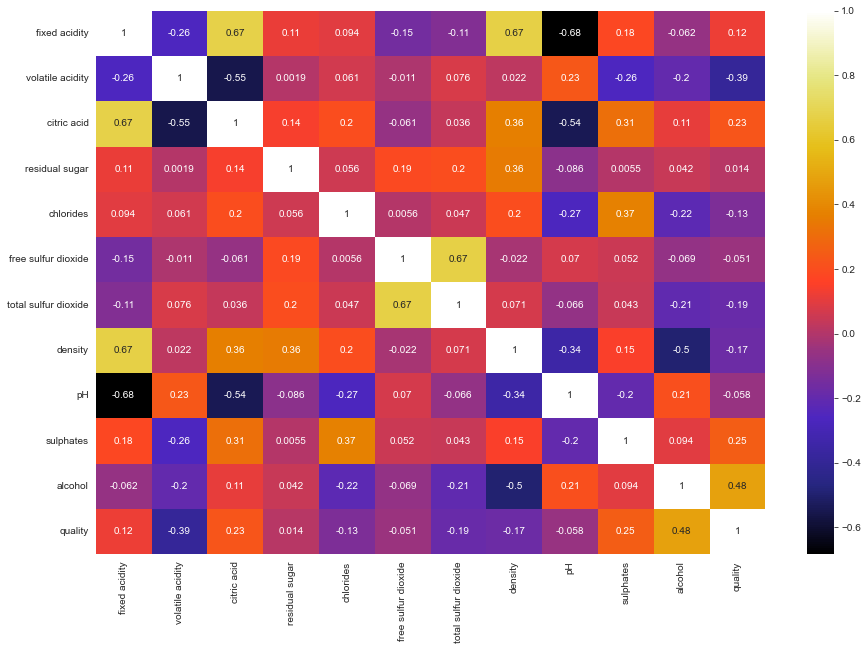

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

- alcohol has good correlation with quality of wine

## Model Builiding

### dependent and independent features

In [15]:
x = df.drop('quality', axis=1)

In [16]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
y = df.quality

In [18]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1071, 11), (528, 11), (1071,), (528,))

### Scaling Features

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler().fit(x_train)

In [24]:
x_train = scaler.transform(x_train)

In [25]:
x_test = scaler.transform(x_test)

### Building model

**references**
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC()

In [28]:
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [29]:
# Run model
svc.fit(x_train, y_train)

SVC()

In [30]:
#accuracy score
print(f'The accuracy score of the model is {svc.score(x_test, y_test):.4f}')

The accuracy score of the model is 0.5985


In [31]:
svc.score(x_train, y_train)

0.6778711484593838

### Hyperparameter tunning svm model

**references**

- https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb (Blog)
- https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167 (for understanding c and gamma)
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [32]:
# we are taking 3 values from range -1 to 1
c_range = np.logspace(-1, 1, 3)
print("The list of values for c are", c_range)

# List of 3 gamma values from -1 to 1 range
gamma_range = np.logspace(-1, 1, 3)
print("the list of values for gamma are", gamma_range)

The list of values for c are [ 0.1  1.  10. ]
the list of values for gamma are [ 0.1  1.  10. ]


In [33]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [34]:
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": c_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }

# Set up score
scoring = ['accuracy']

# set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [35]:
# Define grid search
grid_search = GridSearchCV(estimator=svc,
                          param_grid=param_grid,
                          scoring=scoring,
                           refit='accuracy',
                          n_jobs=-1,
                          cv=kfold,
                          verbose=0)

In [37]:
# Fit grid search
grid_result = grid_search.fit(x_train, y_train)

In [38]:
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['accuracy'])

In [40]:
grid_result.best_estimator_

SVC(gamma=0.1)

In [43]:
grid_result.best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(x_test, y_test):.4f}')

The best accuracy score for the training dataset is 0.6144
The best hyperparameters are {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
The accuracy score for the testing dataset is 0.6042


In [61]:
scores = grid_result.cv_results_['mean_test_accuracy'].reshape(6, 5)

In [62]:
scores

array([[0.57703081, 0.54528478, 0.43323996, 0.54901961, 0.43323996],
       [0.53034547, 0.57796452, 0.53314659, 0.57609711, 0.53221289],
       [0.61437908, 0.60037348, 0.61437908, 0.55742297, 0.51727358],
       [0.52567694, 0.61157796, 0.59663866, 0.61251167, 0.60130719],
       [0.60877684, 0.58543417, 0.61437908, 0.52474323, 0.51353875],
       [0.52567694, 0.61064426, 0.58823529, 0.61251167, 0.59383754]])